In [1]:
# import libraries
import pandas as pd

In [2]:
# Read in predictions
preds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/predictions.csv')

In [6]:
# Convert to datetime object
preds['Date'] = pd.to_datetime(preds['Date'])

<ipython-input-6-004f8fa1c19a>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  preds['Date'] = pd.to_datetime(preds['Date'])


In [8]:
# Check if Date is converted to datetime object
preds.dtypes

Unnamed: 0             int64
id                     int64
UserName              object
Review                object
Score                  int64
Date          datetime64[ns]
Bank                  object
Positive             float64
Negative             float64
dtype: object

In [7]:
# Sort by date
preds.sort_values(by=['Date'], inplace=True)

In [9]:
# Cumulative sum of sentiments by category (Postive and Negative)
preds['cum_pos'] = preds['Positive'].cumsum()
preds['cum_neu'] = preds['Negative'].cumsum()

In [10]:
# Monthly rolling sum of sentiments
preds['cum_pos'] = preds.rolling(window="30D", on='Date')['Positive'].sum()
preds['cum_neg'] = preds.rolling(window="30D", on='Date')['Negative'].sum()

In [21]:
# Separate into GXS vs Other Banks:
preds_GXS = preds.loc[preds['Bank'].eq('GXS Bank')]
preds_rest = preds[(preds.Bank != 'GXS Bank')]

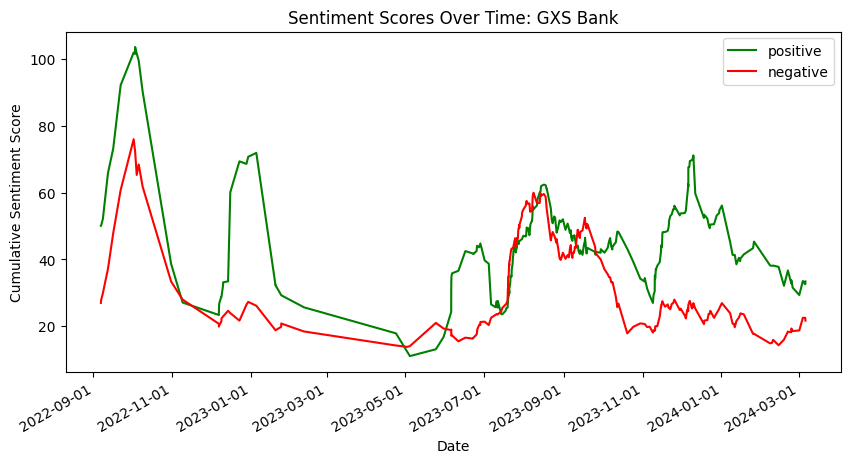

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Sentiment Score over time for GXS

# Plot
plt.figure(figsize=(10, 5))
plt.plot(preds_GXS['Date'], preds_GXS['cum_pos'], linestyle='solid', label = 'positive', color = 'green')
plt.plot(preds_GXS['Date'], preds_GXS['cum_neg'], linestyle='solid', label = 'negative', color = 'red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # format x-axis labels
plt.gcf().autofmt_xdate() # auto fit x-axis labels
plt.xlabel("Date")
plt.ylabel("Cumulative Sentiment Score")
plt.title('Sentiment Scores Over Time: GXS Bank')
plt.legend()
plt.show()

In [28]:
# Earliest GXS Review
preds_GXS.Date.iloc[0]
# 2022-09-06

Timestamp('2022-09-06 17:57:00')

In [30]:
# Compare within the same timeframe as GXS
# Filter rest of the banks's scores to be in the same timeframe as GXS
preds_rest = preds_rest[(preds_rest['Date'] > "2022-09-06")]

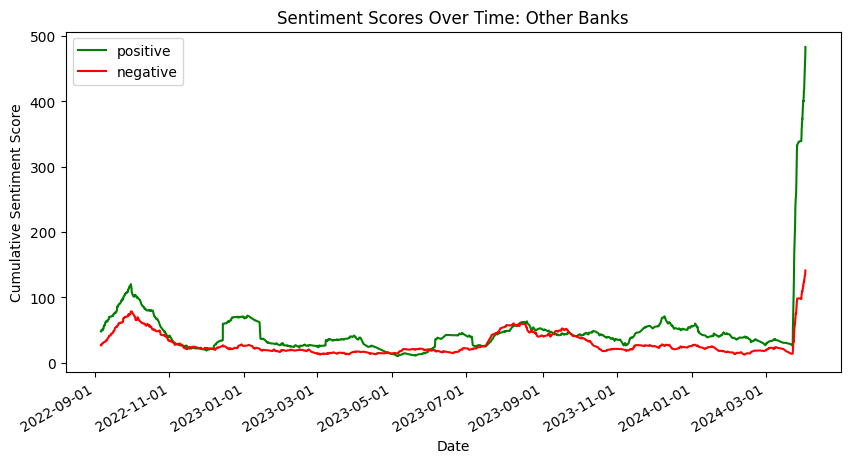

In [31]:
# Sentiment Score over time for other banks

# Plot
plt.figure(figsize=(10, 5))
plt.plot(preds_rest['Date'], preds_rest['cum_pos'], linestyle='solid', label = 'positive', color = 'green')
plt.plot(preds_rest['Date'], preds_rest['cum_neg'], linestyle='solid', label = 'negative', color = 'red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # format x-axis labels
plt.gcf().autofmt_xdate() # auto fit x-axis labels
plt.xlabel("Date")
plt.ylabel("Cumulative Sentiment Score")
plt.title('Sentiment Scores Over Time: Other Banks')
plt.legend()
plt.show()